In [1]:
import math
import tensorflow as tf
from sklearn.utils import shuffle
single_x = []
single_y = []
single_z = []
single_E = []
single_x.append([])
single_y.append([])
single_z.append([])
single_E.append([])
single_gamma_length = 0
idx = 0
gamma_length = 0
with open("/Users/Tiger/nexo_py/scripts/AnalyzePosition/Single_x.txt") as f1,open("/Users/Tiger/nexo_py/scripts/AnalyzePosition/Single_y.txt") as f2, open("/Users/Tiger/nexo_py/scripts/AnalyzePosition/Single_z.txt") as f3,open("/Users/Tiger/nexo_py/scripts/AnalyzePosition/Single_E.txt") as f4:
    for (line1,line2,line3,line4) in zip(f1,f2,f3,f4):
        if (line1 == "gamma\n"):
            single_gamma_length += 1
        if(line1 != "gamma\n" and line1 != "bb0n\n"):
            single_x[idx].append(float(line1))
            single_y[idx].append(float(line2))
            single_z[idx].append(float(line3))
            single_E[idx].append(float(line4))
        else:
            idx+=1
            single_x.append([])
            single_y.append([])
            single_z.append([])
            single_E.append([])

In [2]:
import numpy as np
x_average_center = []
y_average_center = []
z_average_center = []
for i in range(0, len(single_x)):
    x_center = np.average(single_x[i], weights = single_E[i])
    x_average_center.append(x_center)
    y_center = np.average(single_y[i], weights = single_E[i])
    y_average_center.append(y_center)
    z_center = np.average(single_z[i], weights = single_E[i])
    z_average_center.append(z_center)

In [3]:
import math
x_radius = []
y_radius = []
z_radius = []

x_radius.append([])
y_radius.append([])
z_radius.append([])

radius = []
radius.append([])


for i in range(0, len(single_x)):
    for j in range(0, len(single_x[i])):
        x_radius[i].append(abs(single_x[i][j] - x_average_center[i]))
        y_radius[i].append(abs(single_y[i][j] - y_average_center[i]))
        z_radius[i].append(abs(single_z[i][j] - z_average_center[i]))
        radius[i].append(math.sqrt(x_radius[i][j]**(2) + y_radius[i][j]**(2) + z_radius[i][j]**(2)))
        
    x_radius.append([])
    y_radius.append([])
    z_radius.append([])
    radius.append([])

x_radius.pop()
y_radius.pop()
z_radius.pop()
radius.pop()

[]

In [4]:
x_average_radius = []
y_average_radius = []
z_average_radius = []
average_radius = []
average_radius.append([])
for i in range (0,len(single_x)):
    x_average_radius.append(np.average(x_radius[i], weights = single_E[i]))
    y_average_radius.append(np.average(y_radius[i], weights = single_E[i]))
    z_average_radius.append(np.average(z_radius[i], weights = single_E[i]))
    for j in range (0, len(x_radius[i])):
        average_radius[i].append(math.sqrt(x_radius[i][j]**(2) + y_radius[i][j]**(2) + z_radius[i][j]**(2)))
    average_radius.append([])
average_radius.pop()

[]

In [5]:
r_cutoff = 10

In [6]:
weighted_average_radius = []
cut_x_radius = []
cut_y_radius = []
cut_z_radius = []
cut_single_E = []
cut_single_x = []
cut_single_y = []
cut_single_z = []
cut_single_R = []

cut_x_radius_inR = []
cut_y_radius_inR = []
cut_z_radius_inR = []
cut_single_E_inR = []
cut_single_x_inR = []
cut_single_y_inR = []
cut_single_z_inR = []

count = 0
count2 = 0

print (single_gamma_length)
for i in range (0,len(single_x)):
    weighted_average_radius.append(np.average(average_radius[i], weights = single_E[i]))
for i in range(0, len(weighted_average_radius)):
    if (i < single_gamma_length and weighted_average_radius[i] <= r_cutoff):
        count += 1
        cut_single_E.append(single_E[i])
        cut_single_x.append(single_x[i])
        cut_single_y.append(single_y[i])
        cut_single_z.append(single_z[i])
        cut_x_radius.append(x_radius[i])
        cut_y_radius.append(y_radius[i])
        cut_z_radius.append(z_radius[i])
        cut_single_R.append(average_radius[i])
        cut_single_E_inR.append([])
        cut_single_x_inR.append([])
        cut_single_y_inR.append([])
        cut_single_z_inR.append([])
        cut_x_radius_inR.append([])
        cut_y_radius_inR.append([])
        cut_z_radius_inR.append([])
        for j in range (0, len(single_x[i])):
            if (average_radius[i][j] <= r_cutoff):
                cut_single_E_inR[count2].append(single_E[i][j])
                cut_single_x_inR[count2].append(single_x[i][j])
                cut_single_y_inR[count2].append(single_y[i][j])
                cut_single_z_inR[count2].append(single_z[i][j])
                cut_x_radius_inR[count2].append(x_radius[i][j])
                cut_y_radius_inR[count2].append(y_radius[i][j])
                cut_z_radius_inR[count2].append(z_radius[i][j])
        count2 += 1
for i in range(single_gamma_length, len(weighted_average_radius)):
    if (weighted_average_radius[i] <= r_cutoff):
        cut_single_E.append(single_E[i])
        cut_single_x.append(single_x[i])
        cut_single_y.append(single_y[i])
        cut_single_z.append(single_z[i])
        cut_x_radius.append(x_radius[i])
        cut_y_radius.append(y_radius[i])
        cut_z_radius.append(z_radius[i])
        cut_single_R.append(average_radius[i])
        cut_single_E_inR.append([])
        cut_single_x_inR.append([])
        cut_single_y_inR.append([])
        cut_single_z_inR.append([])
        cut_x_radius_inR.append([])
        cut_y_radius_inR.append([])
        cut_z_radius_inR.append([])
        for j in range (0, len(single_x[i])):
            if (average_radius[i][j] <= r_cutoff):
                cut_single_E_inR[count2].append(single_E[i][j])
                cut_single_x_inR[count2].append(single_x[i][j])
                cut_single_y_inR[count2].append(single_y[i][j])
                cut_single_z_inR[count2].append(single_z[i][j])
                cut_x_radius_inR[count2].append(x_radius[i][j])
                cut_y_radius_inR[count2].append(y_radius[i][j])
                cut_z_radius_inR[count2].append(z_radius[i][j])
        count2+=1
    if (len(cut_single_x) == 2* count and count != 0):
        break
        #weighted_average_radius.pop(i)
print(count)
print(len(cut_single_x))
print(len(cut_single_x_inR))
cut_single_gamma_length = count

1157
1157
2314
2314


In [7]:
x_relative_radius = []
y_relative_radius = []
z_relative_radius = []
x_relative_radius.append([])
y_relative_radius.append([])
z_relative_radius.append([])

x_relative_radius_inR = []
y_relative_radius_inR = []
z_relative_radius_inR = []
x_relative_radius_inR.append([])
y_relative_radius_inR.append([])
z_relative_radius_inR.append([])

for i in range(0, len(cut_single_x)):
    max_x_radius = max(cut_x_radius[i])
    max_y_radius = max(cut_y_radius[i])
    max_z_radius = max(cut_z_radius[i])
    min_x_radius = min(cut_x_radius[i])
    min_y_radius = min(cut_y_radius[i])
    min_z_radius = min(cut_z_radius[i])
    
    max_x_radius_inR = max(cut_x_radius_inR[i])
    max_y_radius_inR = max(cut_y_radius_inR[i])
    max_z_radius_inR = max(cut_z_radius_inR[i])
    min_x_radius_inR = min(cut_x_radius_inR[i])
    min_y_radius_inR = min(cut_y_radius_inR[i])
    min_z_radius_inR = min(cut_z_radius_inR[i])
    
    for j in range(0, len(cut_single_x[i])):
        x_relative_radius[i].append((cut_x_radius[i][j] - min_x_radius)/(max_x_radius - min_x_radius))
        y_relative_radius[i].append((cut_y_radius[i][j] - min_y_radius)/(max_y_radius - min_y_radius))
        z_relative_radius[i].append((cut_z_radius[i][j] - min_z_radius)/(max_z_radius - min_z_radius))
    for k in range(0, len(cut_single_x_inR[i])):    
        x_relative_radius_inR[i].append((cut_x_radius_inR[i][k] - min_x_radius_inR)/(max_x_radius_inR - min_x_radius_inR))
        y_relative_radius_inR[i].append((cut_y_radius_inR[i][k] - min_y_radius_inR)/(max_y_radius_inR - min_y_radius_inR))
        z_relative_radius_inR[i].append((cut_z_radius_inR[i][k] - min_z_radius_inR)/(max_z_radius_inR - min_z_radius_inR))
    
    x_relative_radius.append([])
    y_relative_radius.append([])
    z_relative_radius.append([])
    
    x_relative_radius_inR.append([])
    y_relative_radius_inR.append([])
    z_relative_radius_inR.append([])
    
x_relative_radius_inR.pop()
y_relative_radius_inR.pop()
z_relative_radius_inR.pop()

x_relative_radius.pop()
y_relative_radius.pop()
z_relative_radius.pop()

[]

In [8]:
xy = np.ndarray(shape=(20,20), dtype=float)
xz = np.ndarray(shape=(20,20), dtype=float)
yz = np.ndarray(shape=(20,20), dtype=float)

xy.fill(0)
xz.fill(0)
yz.fill(0)
train_xy = []
train_xz = []
train_yz = []
for i in range(0, len(cut_single_x)):
    min_x = min(cut_single_x[i])
    min_y = min(cut_single_y[i])
    min_z = min(cut_single_z[i])
    max_x = max(cut_single_x[i])
    max_y = max(cut_single_y[i])
    max_z = max(cut_single_z[i])
    
    min_x_inR  = min(cut_single_x_inR [i])
    min_y_inR  = min(cut_single_y_inR [i])
    min_z_inR  = min(cut_single_z_inR [i])
    max_x_inR  = max(cut_single_x_inR [i])
    max_y_inR  = max(cut_single_y_inR [i])
    max_z_inR  = max(cut_single_z_inR [i])
    for j in range(0, len(cut_single_x[i]) - 1):
        cur_x = abs((cut_single_x[i][j]-min_x)/(max_x-min_x))
        cur_y = abs((cut_single_y[i][j]-min_y)/(max_y-min_y))
        cur_z = abs((cut_single_z[i][j]-min_z)/(max_z-min_z))
        xy[int((20*x_relative_radius[i][j] - 1)*cur_x)][int((20*y_relative_radius[i][j] - 1)*cur_y)] += cut_single_E[i][j]
        xz[int((20*x_relative_radius[i][j] - 1)*cur_x)][int((20*z_relative_radius[i][j] - 1)*cur_z)] += cut_single_E[i][j]
        yz[int((20*y_relative_radius[i][j] - 1)*cur_y)][int((20*z_relative_radius[i][j] - 1)*cur_z)] += cut_single_E[i][j]
    #for k in range(0,len(cut_single_x_inR[i]) - 1):
        #cur_x = abs((cut_single_x_inR[i][k]-min_x_inR)/(max_x_inR -min_x_inR))
        #cur_y = abs((cut_single_y_inR[i][k]-min_y_inR)/(max_y_inR -min_y_inR))
        #cur_z = abs((cut_single_z_inR[i][k]-min_z_inR)/(max_z_inR -min_z_inR))
        #xy[int((20*x_relative_radius_inR[i][k] - 1)*cur_x)][int((20*y_relative_radius_inR[i][k] - 1)*cur_y)] += cut_single_E_inR[i][k]
        #xz[int((20*x_relative_radius_inR[i][k] - 1)*cur_x)][int((20*z_relative_radius_inR[i][k] - 1)*cur_z)] += cut_single_E_inR[i][k]
        #yz[int((20*y_relative_radius_inR[i][k] - 1)*cur_y)][int((20*z_relative_radius_inR[i][k] - 1)*cur_z)] += cut_single_E_inR[i][k]
    train_xy.append(xy)
    train_xz.append(xz)
    train_yz.append(yz)
    
    xy = np.ndarray(shape=(20,20), dtype=float)
    xz = np.ndarray(shape=(20,20), dtype=float)
    yz = np.ndarray(shape=(20,20), dtype=float)
    xy.fill(0)
    xz.fill(0)
    yz.fill(0)
print(len(train_xy))

2314


In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def visualize(idx, train):
    x,y= train[idx].nonzero()
    sum(train[idx])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(x, y, c= 'red')
    plt.show()

2314
1157
gamma x-y


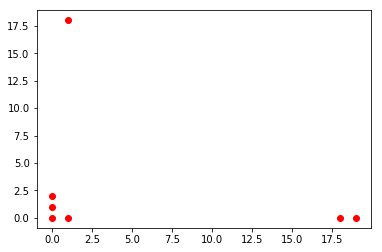

gamma x-z


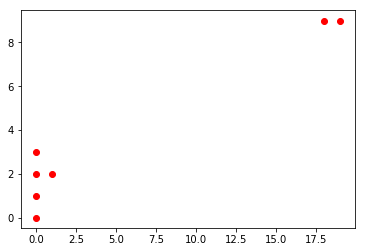

gamma y_z


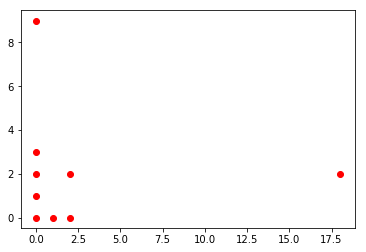

bb0n x-y


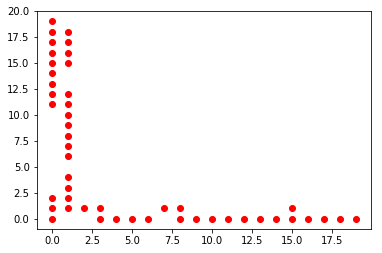

bb0n x-z


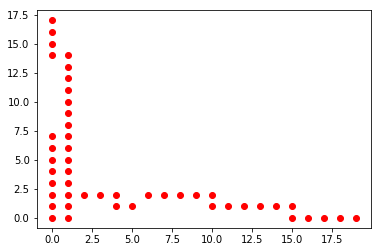

bb0n y-z


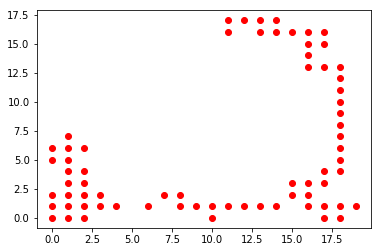

In [10]:
import random
print(len(train_xy))
print (single_gamma_length)
print("gamma x-y")
temp1 = random.randint(0, count)
visualize(temp1, train_xy)
print("gamma x-z")
visualize(temp1, train_xz)
print("gamma y_z")
visualize(temp1, train_yz)
print("bb0n x-y")
temp2 = random.randint(count, count*2-1)
visualize(temp2, train_xy)
print("bb0n x-z")
visualize(temp2, train_xz)
print("bb0n y-z")
visualize(temp2, train_yz)

In [11]:
import tensorflow as tf
from sklearn.utils import shuffle

In [12]:
label = np.ndarray(shape=(len(train_xy)), dtype=int)
label[:cut_single_gamma_length].fill(1)
label[cut_single_gamma_length:].fill(0)
print (len(train_xy))
print(len(label))

2314
2314


In [13]:
train_xy,train_xz,train_yz,label = shuffle(train_xy,train_xz,train_yz,label)
XY_train = train_xy[:int(len(train_xy) - 90)]
XZ_train = train_xz[:int(len(train_xz) - 90)]
YZ_train = train_yz[:int(len(train_yz) - 90)]
Y_train  = label[:int(len(label) - 90)]
XY_Validation = train_xy[int(len(train_xy) - 90):]
XZ_Validation = train_xz[int(len(train_xz) - 90):]
YZ_Validation = train_yz[int(len(train_yz) - 90):]
Y_Validation = label[int(len(label) - 90):]

In [14]:
XY_train = np.reshape(XY_train, [len(XY_train), 20, 20,1])
XZ_train = np.reshape(XZ_train, [len(XZ_train), 20, 20,1])
YZ_train = np.reshape(YZ_train, [len(YZ_train), 20, 20,1])
print(XZ_train.shape)

(2224, 20, 20, 1)


In [15]:
XY_train=np.array(XY_train)
XZ_train=np.array(XZ_train)
YZ_train=np.array(YZ_train)

In [16]:
EPOCHS = 30
BATCH_SIZE = 70

In [17]:
xy_t = tf.placeholder(tf.float32, (None,20, 20, 1))
xz_t = tf.placeholder(tf.float32, (None,20, 20, 1))
yz_t = tf.placeholder(tf.float32, (None,20, 20, 1))
y_t = tf.placeholder(tf.int32, None)
one_hot_y = tf.one_hot(y_t, 2)

In [18]:
from tensorflow.contrib.layers import flatten
def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    layer_depth = {
        'layer_1' : 6,
        'layer_2' : 16,
        'layer_3' : 64,
        'layer_f1' : 20
    }

    
    conv1_w = tf.Variable(tf.truncated_normal(shape = [3,3,1,10],mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(10))
    conv1 = tf.nn.conv2d(x,conv1_w, strides = [1,1,1,1], padding = 'VALID') + conv1_b 
    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)

     #TODO: Pooling. Input = 28x28x6. Output = 14x14x6. 8
    pool_1 = tf.nn.max_pool(conv1,ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16. 6
    conv2_w = tf.Variable(tf.truncated_normal(shape = [3,3,10,30], mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(30))
    conv2 = tf.nn.conv2d(pool_1, conv2_w, strides = [1,1,1,1], padding = 'VALID') + conv2_b
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)
    
    #pool_2 = tf.nn.max_pool(conv2,ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16. 
    conv3_w = tf.Variable(tf.truncated_normal(shape = [1,1,30,40], mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(40))
    conv3 = tf.nn.conv2d(conv2, conv3_w, strides = [1,1,1,1], padding = 'VALID') + conv3_b
    # TODO: Activation.
    conv3 = tf.nn.relu(conv3)
    
    #pool_3 = tf.nn.max_pool(conv3,ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    
    conv4_w = tf.Variable(tf.truncated_normal(shape = [1,1,40,50], mean = mu, stddev = sigma))
    conv4_b = tf.Variable(tf.zeros(50))
    conv4 = tf.nn.conv2d(conv3, conv4_w, strides = [1,1,1,1], padding = 'VALID') + conv4_b
    # TODO: Activation.
    conv4 = tf.nn.relu(conv4)
    
    # TODO: Flatten. Input = 5x5x16. Output = 400. 2x2x16
    fc1 = flatten(conv4)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120. 64
    fc1_w = tf.Variable(tf.truncated_normal(shape = (2450,100), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(100))
    fc1 = tf.matmul(fc1,fc1_w) + fc1_b
    
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)
    #print(fc1)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84. 20 5
    fc2_w = tf.Variable(tf.truncated_normal(shape = (100,50), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(50))
    fc2 = tf.matmul(fc1,fc2_w) + fc2_b
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)
    
    fc3_w = tf.Variable(tf.truncated_normal(shape = (50,25), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(25))
    fc3 = tf.matmul(fc2,fc3_w) + fc3_b
    # TODO: Activation.
    fc3 = tf.nn.relu(fc3)
    
    fc4_w = tf.Variable(tf.truncated_normal(shape = (25,5), mean = mu, stddev = sigma))
    fc4_b = tf.Variable(tf.zeros(5))
    fc4 = tf.matmul(fc3,fc4_w) + fc4_b
    # TODO: Activation.
    fc4 = tf.nn.relu(fc4)
    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10. 5 2
    fc5_w = tf.Variable(tf.truncated_normal(shape = (5,2), mean = mu , stddev = sigma))
    fc5_b = tf.Variable(tf.zeros(1))
    logits = tf.matmul(fc4, fc5_w) + fc5_b
    return logits



In [19]:
rate = 0.0003

logits = (LeNet(xy_t)+LeNet(xz_t)+LeNet(yz_t))/3 
print(logits)
#tf.maximum(tf.maximum(LeNet(xy_t),LeNet(xz_t)),tf.maximum(LeNet(xy_t),LeNet(yz_t)))
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf. train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(cross_entropy)

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Tensor("div:0", shape=(?, 2), dtype=float32)
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [20]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

#def evaluate_1(XY_data,XZ_data,YZ_data, Y_data):
#    num_examples = len(XY_data)
#    total_accuracy = 0
#    sess = tf.get_default_session()
#    XY_data = np.reshape(XY_data, [len(XY_data), 40, 40, 1])
#    XZ_data = np.reshape(XZ_data, [len(XZ_data), 40, 40, 1])
#    YZ_data = np.reshape(YZ_data, [len(YZ_data), 40, 40, 1])
#    batch_xy, batch_xz, batch_yz, batch_y = XY_data[offset:offset+BATCH_SIZE],XZ_data[offset:offset+BATCH_SIZE],YZ_data[offset:offset+BATCH_SIZE],Y_data[offset:offset+BATCH_SIZE]
#    result = sess.run(tf.argmax(logits, 1), feed_dict={xy_t:XY_data,xz_t:XZ_data,yz_t:YZ_data})
#    return result

def evaluate_2(XY_data,XZ_data,YZ_data, Y_data):
    XY_data = np.reshape(XY_data, [len(XY_data), 20, 20,1])
    XZ_data = np.reshape(XZ_data, [len(XZ_data), 20, 20,1])
    YZ_data = np.reshape(YZ_data, [len(YZ_data), 20, 20,1])
    sess = tf.get_default_session()
    result = sess.run(tf.argmax(logits, 1), feed_dict={xy_t:XY_data,xz_t:XZ_data,yz_t:YZ_data})
    correct = 0
    tot1 = 0
    tot2 = 0
    tot_p = 0
    tot_n = 0
    for j in range(0,len(result)):
        if (Y_data[j] == result[j]):
            correct += 1
        if ((Y_data[j] == 0 and result[j] == 1)):
            tot1 +=1
        if ((Y_data[j] == 1 and result[j] == 1)):
            tot2 +=1
        if (Y_data[j] == 1):
            tot_p +=1
        if (Y_data[j] == 0):
            tot_n +=1
    accuracy = (correct/float(len(result)))
    FP = (float(tot1)/float(tot_n))
    TP = (float(tot2)/float(tot_p))
    print("Validation Accuracy = {:.3f}".format(accuracy))
    print("False Positive Rate = {:.3f}".format(FP))
    print("True Positive Rate = {:.3f}".format(TP))
    return result, FP, TP


#def choose(X_data, y_data):
    #X_data, y_data = shuffle(X_data, y_data)
    #num_examples = len(X_data)
    #total_accuracy = 0
    #sess = tf.get_default_session()
    #for offset in range(0, num_examples, BATCH_SIZE):
        #batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        #prediction = sess.run(correct_prediction, feed_dict={x: batch_x, y: batch_y})
    #return 0

In [21]:
from scipy.interpolate import interp1d
FP_rate = []
TP_rate = []
FP_rateS = []
TP_rateS = []
FP_rate.append(0); TP_rate.append(0);
FP_rateS.append(0); TP_rateS.append(0);
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(XY_train)
    XY_Validation,XZ_Validation,YZ_Validation,Y_Validation = shuffle(XY_Validation,XZ_Validation,YZ_Validation,Y_Validation)
    result = []
    print("Training...")
    for i in range(EPOCHS):
        correct = 0
        tot1 = 0
        tot2 = 0
        tot_p = 0
        tot_n = 0
        XY_train,XZ_train,YZ_train,Y_train = shuffle(XY_train,XZ_train,YZ_train,Y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_xy,batch_xz,batch_yz,batch_y = XY_train[offset:end],XZ_train[offset:end],YZ_train[offset:end],Y_train[offset:end]
            sess.run(training_operation, feed_dict={xy_t: batch_xy, xz_t:batch_xz, yz_t:batch_yz, y_t: batch_y})
        XY_Validation,XZ_Validation,YZ_Validation,Y_Validation = shuffle(XY_Validation,XZ_Validation,YZ_Validation,Y_Validation)
        print("")
        print("EPOCH {} ...".format(i+1))
        result, FP, TP = evaluate_2(XY_Validation,XZ_Validation,YZ_Validation, Y_Validation)
        FP_rate.append(FP)
        TP_rate.append(TP)
        FP_rateS.append(FP)
        TP_rateS.append(TP)
    print("Complete")
    save_path = saver.save(sess, "/Users/Tiger/nexo_py/scripts/AnalyzePosition/discriminator.ckpt")
    print("Model Saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.533
False Positive Rate = 1.000
True Positive Rate = 1.000

EPOCH 2 ...
Validation Accuracy = 0.678
False Positive Rate = 0.643
True Positive Rate = 0.958

EPOCH 3 ...
Validation Accuracy = 0.744
False Positive Rate = 0.452
True Positive Rate = 0.917

EPOCH 4 ...
Validation Accuracy = 0.811
False Positive Rate = 0.167
True Positive Rate = 0.792

EPOCH 5 ...
Validation Accuracy = 0.844
False Positive Rate = 0.095
True Positive Rate = 0.792

EPOCH 6 ...
Validation Accuracy = 0.844
False Positive Rate = 0.048
True Positive Rate = 0.750

EPOCH 7 ...
Validation Accuracy = 0.778
False Positive Rate = 0.238
True Positive Rate = 0.792

EPOCH 8 ...
Validation Accuracy = 0.844
False Positive Rate = 0.048
True Positive Rate = 0.750

EPOCH 9 ...
Validation Accuracy = 0.800
False Positive Rate = 0.024
True Positive Rate = 0.646

EPOCH 10 ...
Validation Accuracy = 0.789
False Positive Rate = 0.048
True Positive Rate = 0.646

EPOCH 11 ...
Validation Ac

In [22]:
FP_r_cutoff = []
TP_r_cutoff = []
with open ("/Users/Tiger/nexo_py/scripts/AnalyzePosition/f_p.txt") as f1, open ("/Users/Tiger/nexo_py/scripts/AnalyzePosition/t_p.txt") as f2:
    for (line1,line2) in zip(f1,f2):
        FP_r_cutoff.append(float(line1))
        TP_r_cutoff.append(float(line2))
#print(f_p_r_cutoff)
FP_r_cutoff.append(0)
FP_r_cutoff.append(1)
FP_r_cutoff.sort()
TP_r_cutoff.append(0)
TP_r_cutoff.append(1)
TP_r_cutoff.sort()

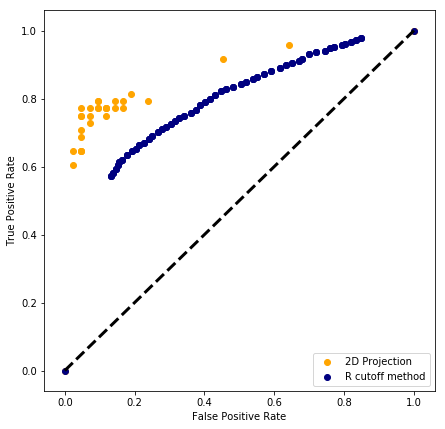

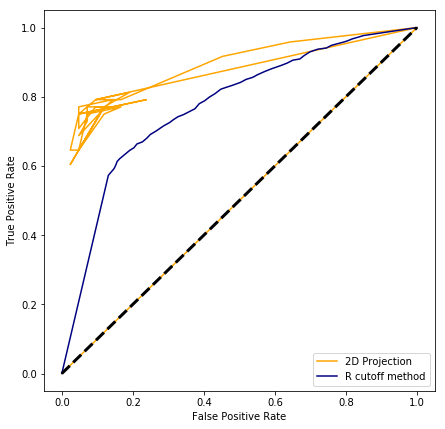

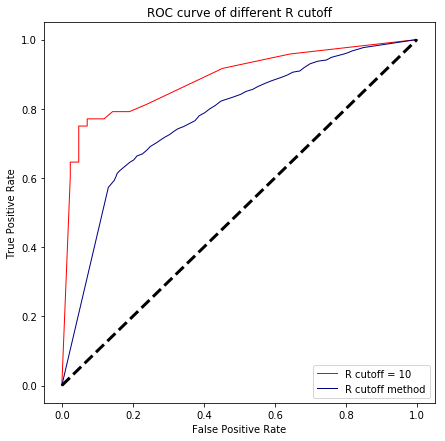

In [23]:
FP_rate.append(1); TP_rate.append(1)
FP_rateS.append(1); TP_rateS.append(1)

FP_rateS.sort()
TP_rateS.sort()

fig2 = plt.figure(figsize = (7,7))
plt.scatter(FP_rate, TP_rate, color = 'orange',label = '2D Projection')
plt.scatter(FP_r_cutoff, TP_r_cutoff, color='navy', label='R cutoff method')
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='black', lw=3, linestyle='--')
plt.show()

fig3 = plt.figure(figsize = (7,7))
plt.plot(FP_rate, TP_rate, color = 'orange',label = '2D Projection')
plt.plot(FP_r_cutoff, TP_r_cutoff, color='navy', label='R cutoff method')
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='black', lw=3, linestyle='--')
plt.show()

fig1 = plt.figure(figsize=(7,7))
ax1 = fig1.add_subplot(111)
plt.plot(FP_rateS, TP_rateS, color='red',lw=1, label='R cutoff = ' + str(r_cutoff))
plt.plot(FP_r_cutoff, TP_r_cutoff, color='navy',lw=1, label='R cutoff method')
plt.legend(loc='lower right')
plt.title('ROC curve of different R cutoff')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='black', lw=3, linestyle='--')
plt.show()

In [29]:
def evaluate_logit(XY_data,XZ_data,YZ_data, Y_data):
    XY_data = np.reshape(XY_data, [len(XY_data), 20, 20,1])
    XZ_data = np.reshape(XZ_data, [len(XZ_data), 20, 20,1])
    YZ_data = np.reshape(YZ_data, [len(YZ_data), 20, 20,1])
    sess = tf.get_default_session()
    result = sess.run(logits, feed_dict={xy_t:XY_data,xz_t:XZ_data,yz_t:YZ_data})
    result = 1/(1+np.exp(-result))
    print(result)

In [30]:
from scipy.interpolate import interp1d
FP_rate = []
TP_rate = []
FP_rateS = []
TP_rateS = []
FP_rate.append(0); TP_rate.append(0);
FP_rateS.append(0); TP_rateS.append(0);
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(XY_train)
    XY_Validation,XZ_Validation,YZ_Validation,Y_Validation = shuffle(XY_Validation,XZ_Validation,YZ_Validation,Y_Validation)
    result = []
    print("Training...")
    for i in range(EPOCHS):
        correct = 0
        tot1 = 0
        tot2 = 0
        tot_p = 0
        tot_n = 0
        XY_train,XZ_train,YZ_train,Y_train = shuffle(XY_train,XZ_train,YZ_train,Y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_xy,batch_xz,batch_yz,batch_y = XY_train[offset:end],XZ_train[offset:end],YZ_train[offset:end],Y_train[offset:end]
            sess.run(training_operation, feed_dict={xy_t: batch_xy, xz_t:batch_xz, yz_t:batch_yz, y_t: batch_y})
        XY_Validation,XZ_Validation,YZ_Validation,Y_Validation = shuffle(XY_Validation,XZ_Validation,YZ_Validation,Y_Validation)
        print("")
        print("EPOCH {} ...".format(i+1))
        result = evaluate_logit(XY_Validation,XZ_Validation,YZ_Validation, Y_Validation)
    print("Complete")
    save_path = saver.save(sess, "/Users/Tiger/nexo_py/scripts/AnalyzePosition/discriminator.ckpt")
    print("Model Saved")

Training...

EPOCH 1 ...
[[0.49921113 0.49936864]
 [0.49920055 0.49938932]
 [0.499274   0.49935162]
 [0.49926805 0.49935412]
 [0.49925318 0.49935997]
 [0.49925843 0.49934408]
 [0.49926984 0.49935353]
 [0.49925968 0.4993533 ]
 [0.49925497 0.49934748]
 [0.4992138  0.49938065]
 [0.4992721  0.49934307]
 [0.4992085  0.49937445]
 [0.49919936 0.49937874]
 [0.4992815  0.4993464 ]
 [0.49922076 0.4993672 ]
 [0.49924085 0.49936828]
 [0.49927327 0.49933696]
 [0.49928588 0.49933594]
 [0.4992155  0.49938112]
 [0.49923033 0.49936923]
 [0.49922454 0.49937958]
 [0.4992825  0.49933392]
 [0.4992841  0.49933726]
 [0.49924374 0.49934784]
 [0.49927667 0.4993426 ]
 [0.49925354 0.49935186]
 [0.49924624 0.49935937]
 [0.4992693  0.499347  ]
 [0.49926022 0.49935907]
 [0.49925545 0.49935627]
 [0.49926865 0.4993457 ]
 [0.49922734 0.49936303]
 [0.4992223  0.49937078]
 [0.4992475  0.4993571 ]
 [0.49925968 0.49935442]
 [0.4992475  0.49935097]
 [0.4991984  0.49937272]
 [0.49926147 0.49933743]
 [0.4992173  0.49937487]



EPOCH 5 ...
[[0.40429398 0.5813683 ]
 [0.4104511  0.56262547]
 [0.38593358 0.5933137 ]
 [0.6194274  0.43295562]
 [0.46692684 0.53679466]
 [0.5300685  0.48634076]
 [0.60514855 0.45480052]
 [0.59792125 0.45695028]
 [0.61975914 0.43251646]
 [0.5558379  0.47294763]
 [0.60457146 0.45035416]
 [0.5146862  0.5097125 ]
 [0.6092231  0.4416517 ]
 [0.43299574 0.5650786 ]
 [0.61446714 0.43530044]
 [0.39614362 0.59001774]
 [0.57373947 0.459133  ]
 [0.4462742  0.5649568 ]
 [0.54915833 0.49013308]
 [0.6135356  0.44654834]
 [0.60705113 0.4420841 ]
 [0.48456588 0.5280858 ]
 [0.54346484 0.4781633 ]
 [0.534647   0.49507663]
 [0.43689778 0.56864125]
 [0.5441184  0.497441  ]
 [0.59539413 0.45818987]
 [0.60108066 0.44846368]
 [0.4174683  0.5762982 ]
 [0.4026521  0.5840158 ]
 [0.5983761  0.45757505]
 [0.5819323  0.47162834]
 [0.5781081  0.4575019 ]
 [0.39415824 0.5857748 ]
 [0.58697957 0.46316975]
 [0.6153411  0.44164786]
 [0.5840451  0.4536462 ]
 [0.61104214 0.4378086 ]
 [0.58469534 0.4608377 ]
 [0.60771   


EPOCH 9 ...
[[0.6204846  0.4497516 ]
 [0.7479288  0.31809822]
 [0.7137457  0.3381234 ]
 [0.65096426 0.37811399]
 [0.2861425  0.7033233 ]
 [0.7159446  0.37696525]
 [0.67663467 0.3590486 ]
 [0.3847845  0.56237596]
 [0.3426212  0.62218386]
 [0.3490957  0.6610161 ]
 [0.5508947  0.501427  ]
 [0.63606477 0.39082316]
 [0.56833893 0.422526  ]
 [0.44196737 0.51980597]
 [0.5861975  0.41879845]
 [0.7030469  0.3550764 ]
 [0.3655016  0.61688393]
 [0.4382764  0.57409817]
 [0.7240684  0.36338094]
 [0.5235246  0.5790677 ]
 [0.71501267 0.3785406 ]
 [0.31448436 0.68723714]
 [0.55469596 0.47879264]
 [0.7309446  0.3506084 ]
 [0.5514846  0.48983017]
 [0.4016413  0.62262315]
 [0.29921958 0.6864256 ]
 [0.7408292  0.33749443]
 [0.3005864  0.68983597]
 [0.69841653 0.40346387]
 [0.77091265 0.30973613]
 [0.5770361  0.46892643]
 [0.32181945 0.66314983]
 [0.67337596 0.37008953]
 [0.74676555 0.3427875 ]
 [0.55699563 0.49100187]
 [0.287972   0.69646776]
 [0.28784522 0.6974145 ]
 [0.29026604 0.68790525]
 [0.71801555


EPOCH 13 ...
[[0.29215574 0.6890324 ]
 [0.42395523 0.54083157]
 [0.6555685  0.3735426 ]
 [0.7386525  0.36001343]
 [0.75549924 0.3194738 ]
 [0.293533   0.6947177 ]
 [0.68079704 0.3560201 ]
 [0.48757586 0.6064578 ]
 [0.7632101  0.32880637]
 [0.32798505 0.6781419 ]
 [0.75910586 0.32405344]
 [0.45183882 0.5061477 ]
 [0.6377117  0.47043592]
 [0.4638076  0.5082893 ]
 [0.72508633 0.36871964]
 [0.35001862 0.6409165 ]
 [0.55094707 0.42577103]
 [0.77228796 0.3141153 ]
 [0.7662526  0.3216957 ]
 [0.4137657  0.64290583]
 [0.60615313 0.44238487]
 [0.31096056 0.69443226]
 [0.73784435 0.3328645 ]
 [0.74976265 0.3466621 ]
 [0.36978617 0.58288497]
 [0.7280971  0.3402532 ]
 [0.3792917  0.65021044]
 [0.6496973  0.4391685 ]
 [0.30458257 0.6835182 ]
 [0.52448463 0.5444249 ]
 [0.30494884 0.6862347 ]
 [0.39403287 0.55354154]
 [0.7580534  0.33280078]
 [0.6383917  0.39012107]
 [0.6432584  0.4722021 ]
 [0.71911    0.39291838]
 [0.76598316 0.31542125]
 [0.31844148 0.6947254 ]
 [0.69803804 0.35453206]
 [0.7803181


EPOCH 17 ...
[[0.2809018  0.704144  ]
 [0.75969636 0.34158456]
 [0.8109615  0.28483525]
 [0.7051489  0.34880453]
 [0.5420078  0.57535666]
 [0.3231076  0.69978565]
 [0.76164603 0.32628122]
 [0.7348995  0.33191368]
 [0.8010847  0.31069732]
 [0.33293918 0.68707937]
 [0.6921514  0.35896495]
 [0.74161434 0.38262564]
 [0.68140405 0.36671087]
 [0.37180763 0.6479533 ]
 [0.8442721  0.25205618]
 [0.39390165 0.55806774]
 [0.6819302  0.41817325]
 [0.7507686  0.32491782]
 [0.28826204 0.70188123]
 [0.32295993 0.6938927 ]
 [0.5523033  0.50699824]
 [0.78197074 0.3407339 ]
 [0.3036565  0.6829479 ]
 [0.74837536 0.34217104]
 [0.5605127  0.5748766 ]
 [0.4729501  0.62132186]
 [0.7721736  0.36052004]
 [0.2917348  0.6978585 ]
 [0.7966455  0.2982202 ]
 [0.4158975  0.56106734]
 [0.31935403 0.68025047]
 [0.66465455 0.45580187]
 [0.67786294 0.43209448]
 [0.30967575 0.70309037]
 [0.50117415 0.59699947]
 [0.67280316 0.47629574]
 [0.6450397  0.48429695]
 [0.48091775 0.57332045]
 [0.6658485  0.43224192]
 [0.7538898


EPOCH 21 ...
[[0.49258208 0.61648715]
 [0.66958565 0.3948629 ]
 [0.7259095  0.3855231 ]
 [0.7182978  0.37785536]
 [0.72379184 0.3533333 ]
 [0.60856205 0.5197201 ]
 [0.69279695 0.3788784 ]
 [0.69540703 0.37469238]
 [0.7819194  0.330778  ]
 [0.4761526  0.60409427]
 [0.32804966 0.67538035]
 [0.7500054  0.38563365]
 [0.3088394  0.71367526]
 [0.6437312  0.38202733]
 [0.8053833  0.31952184]
 [0.75836694 0.3889713 ]
 [0.52221173 0.53286654]
 [0.41046527 0.56558496]
 [0.73116565 0.34690747]
 [0.7383154  0.3673992 ]
 [0.61671835 0.5532081 ]
 [0.6451093  0.44224653]
 [0.45836893 0.58143234]
 [0.83016926 0.26685622]
 [0.30020192 0.68791026]
 [0.6136439  0.5208446 ]
 [0.68422276 0.45415795]
 [0.81363726 0.296569  ]
 [0.31180286 0.7040619 ]
 [0.7200607  0.42007557]
 [0.53279823 0.4978755 ]
 [0.29683626 0.7170177 ]
 [0.76762056 0.34752396]
 [0.63588744 0.4212535 ]
 [0.7849393  0.30018112]
 [0.27789465 0.710491  ]
 [0.29616067 0.681712  ]
 [0.30361393 0.7052266 ]
 [0.55964196 0.5284618 ]
 [0.7395234


EPOCH 25 ...
[[0.30300048 0.6932192 ]
 [0.63323313 0.40055367]
 [0.72920924 0.4113334 ]
 [0.47506022 0.55678827]
 [0.3172963  0.68728083]
 [0.8189804  0.2860937 ]
 [0.7058261  0.40361965]
 [0.7929436  0.29397908]
 [0.4932537  0.5968413 ]
 [0.32472414 0.6746397 ]
 [0.2859771  0.70218587]
 [0.727301   0.37751684]
 [0.30174404 0.6917559 ]
 [0.4637873  0.63041145]
 [0.43299985 0.639964  ]
 [0.3126532  0.6774481 ]
 [0.7392205  0.3716679 ]
 [0.7083551  0.3754015 ]
 [0.7267031  0.38040406]
 [0.4509232  0.5935111 ]
 [0.59905225 0.4760746 ]
 [0.6429148  0.42006937]
 [0.5618622  0.4188131 ]
 [0.3149266  0.6968088 ]
 [0.7376769  0.40213844]
 [0.3166255  0.70063376]
 [0.37059376 0.5900368 ]
 [0.597625   0.58195335]
 [0.62600666 0.5349895 ]
 [0.694602   0.37719095]
 [0.49656403 0.6182676 ]
 [0.38088575 0.6027672 ]
 [0.2970924  0.68107647]
 [0.81085545 0.31996712]
 [0.6603695  0.47852924]
 [0.6931624  0.4602633 ]
 [0.7717378  0.32419574]
 [0.41118076 0.57548183]
 [0.2988741  0.70349866]
 [0.3144225


EPOCH 29 ...
[[0.7049363  0.38364562]
 [0.4478758  0.5178577 ]
 [0.78601587 0.32470033]
 [0.709084   0.44410977]
 [0.6421921  0.52867985]
 [0.6761635  0.38207987]
 [0.3090009  0.6974951 ]
 [0.79776543 0.31398857]
 [0.40072206 0.56687415]
 [0.56273836 0.5608367 ]
 [0.3031317  0.6805737 ]
 [0.40218863 0.6697306 ]
 [0.5712023  0.4804495 ]
 [0.27091992 0.7075963 ]
 [0.2823037  0.71301204]
 [0.2993261  0.692919  ]
 [0.719605   0.3513144 ]
 [0.82347    0.28436884]
 [0.7943813  0.31947476]
 [0.79510725 0.30351052]
 [0.29430568 0.6780491 ]
 [0.32147467 0.7119396 ]
 [0.6301986  0.39997995]
 [0.30167875 0.70988023]
 [0.7299064  0.35113448]
 [0.4027139  0.575291  ]
 [0.28609174 0.69052726]
 [0.6088971  0.49235752]
 [0.68048745 0.39514485]
 [0.56397384 0.42807582]
 [0.28990188 0.68029106]
 [0.6045372  0.58458644]
 [0.6004616  0.40323946]
 [0.80022645 0.29606134]
 [0.6400297  0.4301284 ]
 [0.30186006 0.6909409 ]
 [0.3141351  0.67725784]
 [0.710085   0.40503317]
 [0.6171027  0.50943923]
 [0.5368238

In [39]:
test_x = []
test_y = []
test_z = []
test_x.append([])
test_y.append([])
test_z.append([])
idx = 0
with open("/Users/Tiger/nexo_py/txt/test_gamma_x.txt") as f1, open("/Users/Tiger/nexo_py/txt/test_gamma_y.txt") as f2, open("/Users/Tiger/nexo_py/txt/test_gamma_z.txt") as f3:
    for (line1,line2,line3) in zip(f1,f2,f3):
        if( line1 != "seprate\n"):
            test_x[idx].append( float(line1) )
            test_y[idx].append( float(line2) )
            test_z[idx].append( float(line3) )
        else:
            idx+=1
            test_x.append([])
            test_y.append([])
            test_z.append([])
            
            
with open("/Users/Tiger/nexo_py/txt/test_bb0n_x.txt") as f1, open("/Users/Tiger/nexo_py/txt/test_bb0n_y.txt") as f2, open("/Users/Tiger/nexo_py/txt/test_bb0n_z.txt") as f3:
    for (line1,line2,line3) in zip(f1,f2,f3):
        if( line1 != "seprate\n"):
            test_x[idx].append( float(line1) )
            test_y[idx].append( float(line2) )
            test_z[idx].append( float(line3) )
        else:
            idx+=1
            test_x.append([])
            test_y.append([])
            test_z.append([])
test_x.pop()
test_y.pop()
test_z.pop()
print(len(test_x))

2606


In [40]:
test_eng=[]
test_eng.append([])
idx = 0
with open("/Users/Tiger/nexo_py/txt/test_gamma_EnergyDeposit.txt") as f1:
    for line in f1:
        if( line != "seprate\n"):
            test_eng[idx].append( float(line) )
        else:
            idx+=1
            test_eng.append([])
test_eng.pop()
test_gamma_length = len(test_eng)
test_eng.append([])

with open("/Users/Tiger/nexo_py/txt/test_bb0n_EnergyDeposit.txt") as f1:
    for line in f1:
        if( line != "seprate\n"):
            test_eng[idx].append( float(line) )
        else:
            idx+=1
            test_eng.append([])
            
test_eng.pop()

[]

In [41]:
import numpy as np
test_single_x = []
test_single_y = []
test_single_z = []
test_single_E = []
test_single_idx = []
average_x = 0
average_y = 0
average_z = 0
count = 0
cluster_count = 0
test_single_gamma_length = 0
for i in range(0, len(test_x)):
    average_x = 0
    average_y = 0
    average_z = 0
    sum_x = 0
    sum_y = 0
    sum_z = 0
    if (i == test_gamma_length):
        test_single_gamma_length = len(test_single_x)
    if (len(test_single_x) == 2*test_single_gamma_length and test_single_gamma_length != 0):
        print(i)
        break
    for j in range (4, len(test_x[i]) - 1): 
        sum_x += test_x[i][j]
        sum_y += test_y[i][j]
        sum_z += test_z[i][j]
        average_x = sum_x/(j+1 - count - 4)
        average_y = sum_y/(j+1 - count - 4)
        average_z = sum_z/(j+1 - count - 4) 
        if (math.sqrt((abs(average_x - test_x[i][j + 1])**2 + 
            abs(average_y - test_y[i][j + 1])**2 + 
            abs(average_z - test_z[i][j + 1])**2)) > 7 and j > 3):
            cluster_count += 1
            count = j
            sum_x = 0
            sum_y = 0
            sum_z = 0
    if (cluster_count == 0):
        test_single_x.append(test_x[i])
        test_single_y.append(test_y[i])
        test_single_z.append(test_z[i])
        test_single_E.append(test_eng[i])
        test_single_idx.append(i)
    count = 0
    cluster_count = 0

print(test_single_gamma_length)            
print(len(test_single_x))        

1756
126
252


In [42]:
test_center = []
test_x_average_center = []
test_y_average_center = []
test_z_average_center = []
for i in range(0, len(test_single_idx)):
    #bb0n center
    x_center = np.average(test_single_x[i], weights = test_single_E[i])
    test_x_average_center.append(x_center)
    y_center = np.average(test_single_y[i], weights = test_single_E[i])
    test_y_average_center.append(y_center)
    z_center = np.average(test_single_z[i], weights = test_single_E[i])
    test_z_average_center.append(z_center)
    test_center.append([x_center,y_center,z_center])

In [43]:
import math
test_x_radius = []
test_y_radius = []
test_z_radius = []

test_x_radius.append([])
test_y_radius.append([])
test_z_radius.append([])

test_radius = []
test_radius.append([])


for i in range(0, len(test_single_idx)):
    for j in range(0, len(test_single_x[i])):
        #bb0n radius for each deposition relative to weighted center
        test_x_radius[i].append(abs(test_single_x[i][j] - test_x_average_center[i]))
        test_y_radius[i].append(abs(test_single_y[i][j] - test_y_average_center[i]))
        test_z_radius[i].append(abs(test_single_z[i][j] - test_z_average_center[i]))
        test_radius[i].append(math.sqrt(test_x_radius[i][j]**(2) + test_y_radius[i][j]**(2) + test_z_radius[i][j]**(2)))
        
    test_x_radius.append([])
    test_y_radius.append([])
    test_z_radius.append([])
    test_radius.append([])

test_x_radius.pop()
test_y_radius.pop()
test_z_radius.pop()
test_radius.pop()




[]

In [44]:
test_x_average_radius = []
test_y_average_radius = []
test_z_average_radius = []
test_average_radius = []
test_average_radius.append([])
for i in range (0,len(test_single_idx)):
    test_x_average_radius.append(np.average(test_x_radius[i], weights = test_single_E[i]))
    test_y_average_radius.append(np.average(test_y_radius[i], weights = test_single_E[i]))
    test_z_average_radius.append(np.average(test_z_radius[i], weights = test_single_E[i]))
    for j in range (0, len(test_x_radius[i])):
        test_average_radius[i].append(math.sqrt(test_x_radius[i][j]**(2) + test_y_radius[i][j]**(2) + test_z_radius[i][j]**(2)))
    test_average_radius.append([])
test_average_radius.pop()

[]

In [45]:
test_weighted_average_radius = []
test_cut_x_radius = []
test_cut_y_radius = []
test_cut_z_radius = []
test_cut_E = []
test_cut_single_E = []
test_cut_single_x = []
test_cut_single_y = []
test_cut_single_z = []
test_cut_single_idx = []
count = 0
test_r_cutoff = 10
print(len(test_single_idx))
print(len(test_average_radius))
print(len(test_single_E))
for i in range (0,len(test_single_idx)):
    test_weighted_average_radius.append(np.average(test_average_radius[i], weights = test_single_E[i]))
for i in range(0, len(test_weighted_average_radius)):
    if (i < test_single_gamma_length and test_weighted_average_radius[i] <= test_r_cutoff):
        count += 1
    if (test_weighted_average_radius[i] <= test_r_cutoff):
        test_cut_single_idx.append(test_single_idx[i])
        test_cut_single_E.append(test_single_E[i])
        test_cut_single_x.append(test_single_x[i])
        test_cut_single_y.append(test_single_y[i])
        test_cut_single_z.append(test_single_z[i])
        test_cut_x_radius.append(test_x_radius[i])
        test_cut_y_radius.append(test_y_radius[i])
        test_cut_z_radius.append(test_z_radius[i])
    if (len(test_cut_single_idx) == 2* count and count != 0):
        break
        #weighted_average_radius.pop(i)
print(count)
test_single_gamma_length = count
print(len(test_cut_single_idx))

252
252
252
126
252


In [46]:
test_x_relative_radius = []
test_y_relative_radius = []
test_z_relative_radius = []
test_x_relative_radius.append([])
test_y_relative_radius.append([])
test_z_relative_radius.append([])
for i in range(0, len(test_cut_single_idx)):
    max_x_radius = max(test_cut_x_radius[i])
    max_y_radius = max(test_cut_y_radius[i])
    max_z_radius = max(test_cut_z_radius[i])
    min_x_radius = min(test_cut_x_radius[i])
    min_y_radius = min(test_cut_y_radius[i])
    min_z_radius = min(test_cut_z_radius[i])
    for j in range(0, len(test_cut_single_x[i])):
        test_x_relative_radius[i].append((test_cut_x_radius[i][j] - min_x_radius)/(max_x_radius - min_x_radius))
        test_y_relative_radius[i].append((test_cut_y_radius[i][j] - min_y_radius)/(max_y_radius - min_y_radius))
        test_z_relative_radius[i].append((test_cut_z_radius[i][j] - min_z_radius)/(max_z_radius - min_z_radius))
    test_x_relative_radius.append([])
    test_y_relative_radius.append([])
    test_z_relative_radius.append([])

In [51]:
xy = np.ndarray(shape=(20,20), dtype=float)
xz = np.ndarray(shape=(20,20), dtype=float)
yz = np.ndarray(shape=(20,20), dtype=float)

xy.fill(0)
xz.fill(0)
yz.fill(0)
test_xy = []
test_xz = []
test_yz = []
for i in range(0, len(test_cut_single_x)):
    min_x = min(test_cut_single_x[i])
    min_y = min(test_cut_single_y[i])
    min_z = min(test_cut_single_z[i])
    max_x = max(test_cut_single_x[i])
    max_y = max(test_cut_single_y[i])
    max_z = max(test_cut_single_z[i])
    
    for j in range(0, len(test_cut_single_x[i]) - 1):
        cur_x = abs((test_cut_single_x[i][j]-min_x)/(max_x-min_x))
        cur_y = abs((test_cut_single_y[i][j]-min_y)/(max_y-min_y))
        cur_z = abs((test_cut_single_z[i][j]-min_z)/(max_z-min_z))
        xy[int((20*test_x_relative_radius[i][j] - 1)*cur_x)][int((20*test_y_relative_radius[i][j] - 1)*cur_y)] += test_cut_single_E[i][j]
        xz[int((20*test_x_relative_radius[i][j] - 1)*cur_x)][int((20*test_z_relative_radius[i][j] - 1)*cur_z)] += test_cut_single_E[i][j]
        yz[int((20*test_y_relative_radius[i][j] - 1)*cur_y)][int((20*test_z_relative_radius[i][j] - 1)*cur_z)] += test_cut_single_E[i][j]
    #for k in range(0,len(cut_single_x_inR[i]) - 1):
        #cur_x = abs((cut_single_x_inR[i][k]-min_x_inR)/(max_x_inR -min_x_inR))
        #cur_y = abs((cut_single_y_inR[i][k]-min_y_inR)/(max_y_inR -min_y_inR))
        #cur_z = abs((cut_single_z_inR[i][k]-min_z_inR)/(max_z_inR -min_z_inR))
        #xy[int((20*x_relative_radius_inR[i][k] - 1)*cur_x)][int((20*y_relative_radius_inR[i][k] - 1)*cur_y)] += cut_single_E_inR[i][k]
        #xz[int((20*x_relative_radius_inR[i][k] - 1)*cur_x)][int((20*z_relative_radius_inR[i][k] - 1)*cur_z)] += cut_single_E_inR[i][k]
        #yz[int((20*y_relative_radius_inR[i][k] - 1)*cur_y)][int((20*z_relative_radius_inR[i][k] - 1)*cur_z)] += cut_single_E_inR[i][k]
    test_xy.append(xy)
    test_xz.append(xz)
    test_yz.append(yz)
    
    xy = np.ndarray(shape=(20,20), dtype=float)
    xz = np.ndarray(shape=(20,20), dtype=float)
    yz = np.ndarray(shape=(20,20), dtype=float)
    xy.fill(0)
    xz.fill(0)
    yz.fill(0)
print(len(test_xy))

252


In [52]:
label = np.ndarray(shape=(len(test_xy)), dtype=int)
label[:test_single_gamma_length].fill(1)
label[test_single_gamma_length:].fill(0)
print (len(test_xy))
print(len(label))

252
252


In [54]:
test_xy,test_xz,test_yz,label = shuffle(test_xy,test_xz,test_yz,label)
XY_test = np.reshape(test_xy, [len(test_xy), 20, 20,1])
XZ_test = np.reshape(test_xz, [len(test_xz), 20, 20,1])
YZ_test = np.reshape(test_yz, [len(test_yz), 20, 20,1])
print(XZ_test.shape)

(252, 20, 20, 1)


In [58]:
with tf.Session() as sess:
    count = 0
    saver.restore(sess, "/Users/Tiger/nexo_py/scripts/AnalyzePosition/discriminator.ckpt")
    print("Model restored.")
    test_xy,test_xz,test_yz,label = shuffle(test_xy,test_xz,test_yz,label)
    result = sess.run(tf.argmax(logits,1), feed_dict={xy_t: XY_test, xz_t:XZ_test, yz_t:YZ_test, y_t: label})
    validation = label
    print(result)
    print(validation)
    difference = 0 
    for i in range(0, len(result)):
        difference += abs(result[i] - validation[i])
        print(difference)
    print("Error Percentage: " + str(difference/len(result)))
    print("correct Percentage: " + str((len(result)-difference)/len(result)))

INFO:tensorflow:Restoring parameters from /Users/Tiger/nexo_py/scripts/AnalyzePosition/discriminator.ckpt
Model restored.
[0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0
 1 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 1
 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1
 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 1
 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0
 0 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1
 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1]
[1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0
 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0
 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0
 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1
 1 1 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1